# **Credit Risk Dataset**



person_age - возраст клиента

person_income - годовой доход

person_home_ownership - владение домом

person_emp_length - продолжительность трудовой деятельности (в годах)

loan_intent - намерение предоставить кредит

loan_grade - кредитный рейтинг

loan_amnt - сумма кредита

loan_int_rate - процентная ставка

loan_status - Статус кредита (0 - неисполнение обязательств, 1 - неисполнение обязательств)

loan_percent_income - процентный доход

cb_person_default_on_file - исторический дефолт

cb_preson_cred_hist_length - продолжительность кредитной истории

**Data import**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import json
import os

In [2]:
!pip install -q kaggle
!pip install kagglehub

In [3]:
import kagglehub

path = kagglehub.dataset_download("laotse/credit-risk-dataset")
print(f"Датасет загружен в: {path}")

Датасет загружен в: /kaggle/input/credit-risk-dataset


In [4]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        print(f"Найден файл: {filepath}")
        if filename.endswith('.csv'):
            import pandas as pd
            try:
                df = pd.read_csv(filepath)
                print(f"  → Загружен DataFrame: {df.shape}")
            except Exception as e:
                print(f"  → Ошибка загрузки: {e}")

Найден файл: /kaggle/input/credit-risk-dataset/credit_risk_dataset.csv
  → Загружен DataFrame: (32581, 12)


In [5]:
df.sample(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
27098,27,24840,OWN,0.0,MEDICAL,A,11500,8.49,0,0.46,N,6
359,22,16200,OWN,6.0,PERSONAL,B,2000,12.42,0,0.12,N,3
10846,24,44000,RENT,2.0,PERSONAL,A,10000,7.49,0,0.23,N,2
826,23,74800,RENT,1.0,MEDICAL,E,20000,17.04,1,0.23,Y,2
16751,25,28128,RENT,2.0,VENTURE,D,7500,15.33,1,0.27,N,3
12360,22,74000,MORTGAGE,4.0,PERSONAL,D,15000,15.05,1,0.20,N,3
8772,23,60000,MORTGAGE,8.0,EDUCATION,B,21000,NaN,0,0.35,N,3
31277,37,85000,MORTGAGE,19.0,HOMEIMPROVEMENT,B,10000,9.99,0,0.12,N,16
29159,41,250000,MORTGAGE,18.0,EDUCATION,B,5000,9.99,0,0.02,N,12
21121,27,45000,MORTGAGE,3.0,MEDICAL,C,18000,12.87,0,0.40,N,8


In [6]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [7]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [8]:
df.shape

(32581, 12)

In [9]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
df.isnull().sum()
# пустые значения есть в продолжительности трудовой деятельности и процентной ставке

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
# нужно поработать с пустыми значениями, они есть в продолжительности трудовой деятельности и в процентной ставке
# заполню трудовой стаж модой, а процентную ставку мединой
df['person_emp_length'].fillna(df['person_emp_length'].mode()[0], inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

/tmp/ipykernel_17/919206819.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].mode()[0], inplace=True)
/tmp/ipykernel_17/919206819.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [12]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

**Feature Analysis**

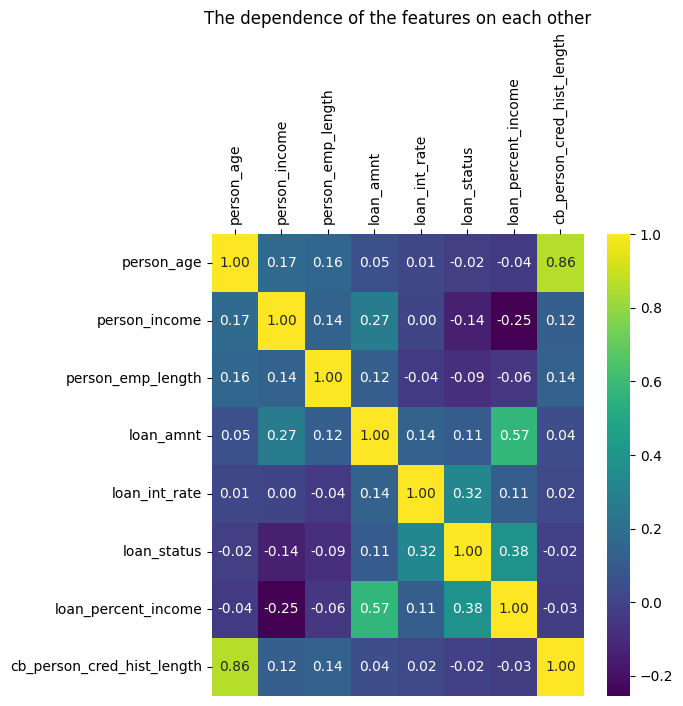

In [13]:
# heatmap
plt.figure(figsize=(6,6))
plt.title('The dependence of the features on each other')
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_columns]
g = sns.heatmap(data=numeric_df.corr(), annot=True, cmap='viridis', fmt='.2f')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)
plt.show()

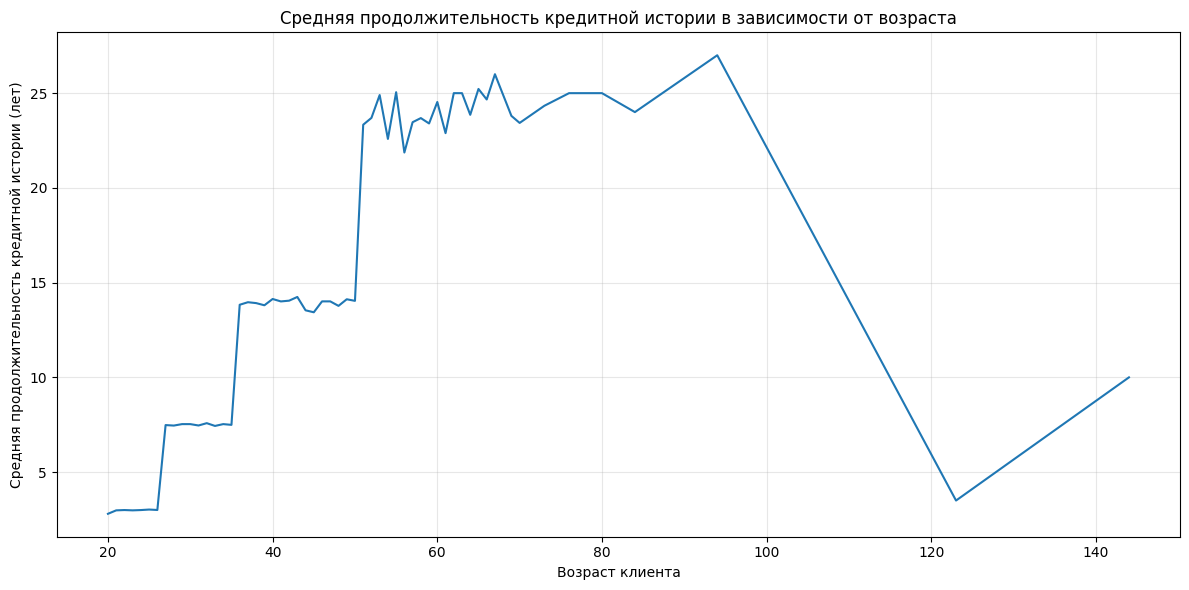

In [14]:
# группирую по возрасту и считаем среднюю продолжительность кредитной истории
age_vs_credit = df.groupby('person_age')['cb_person_cred_hist_length'].mean()

plt.figure(figsize=(12, 6))
age_vs_credit.plot()
plt.title('Средняя продолжительность кредитной истории в зависимости от возраста')
plt.xlabel('Возраст клиента')
plt.ylabel('Средняя продолжительность кредитной истории (лет)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

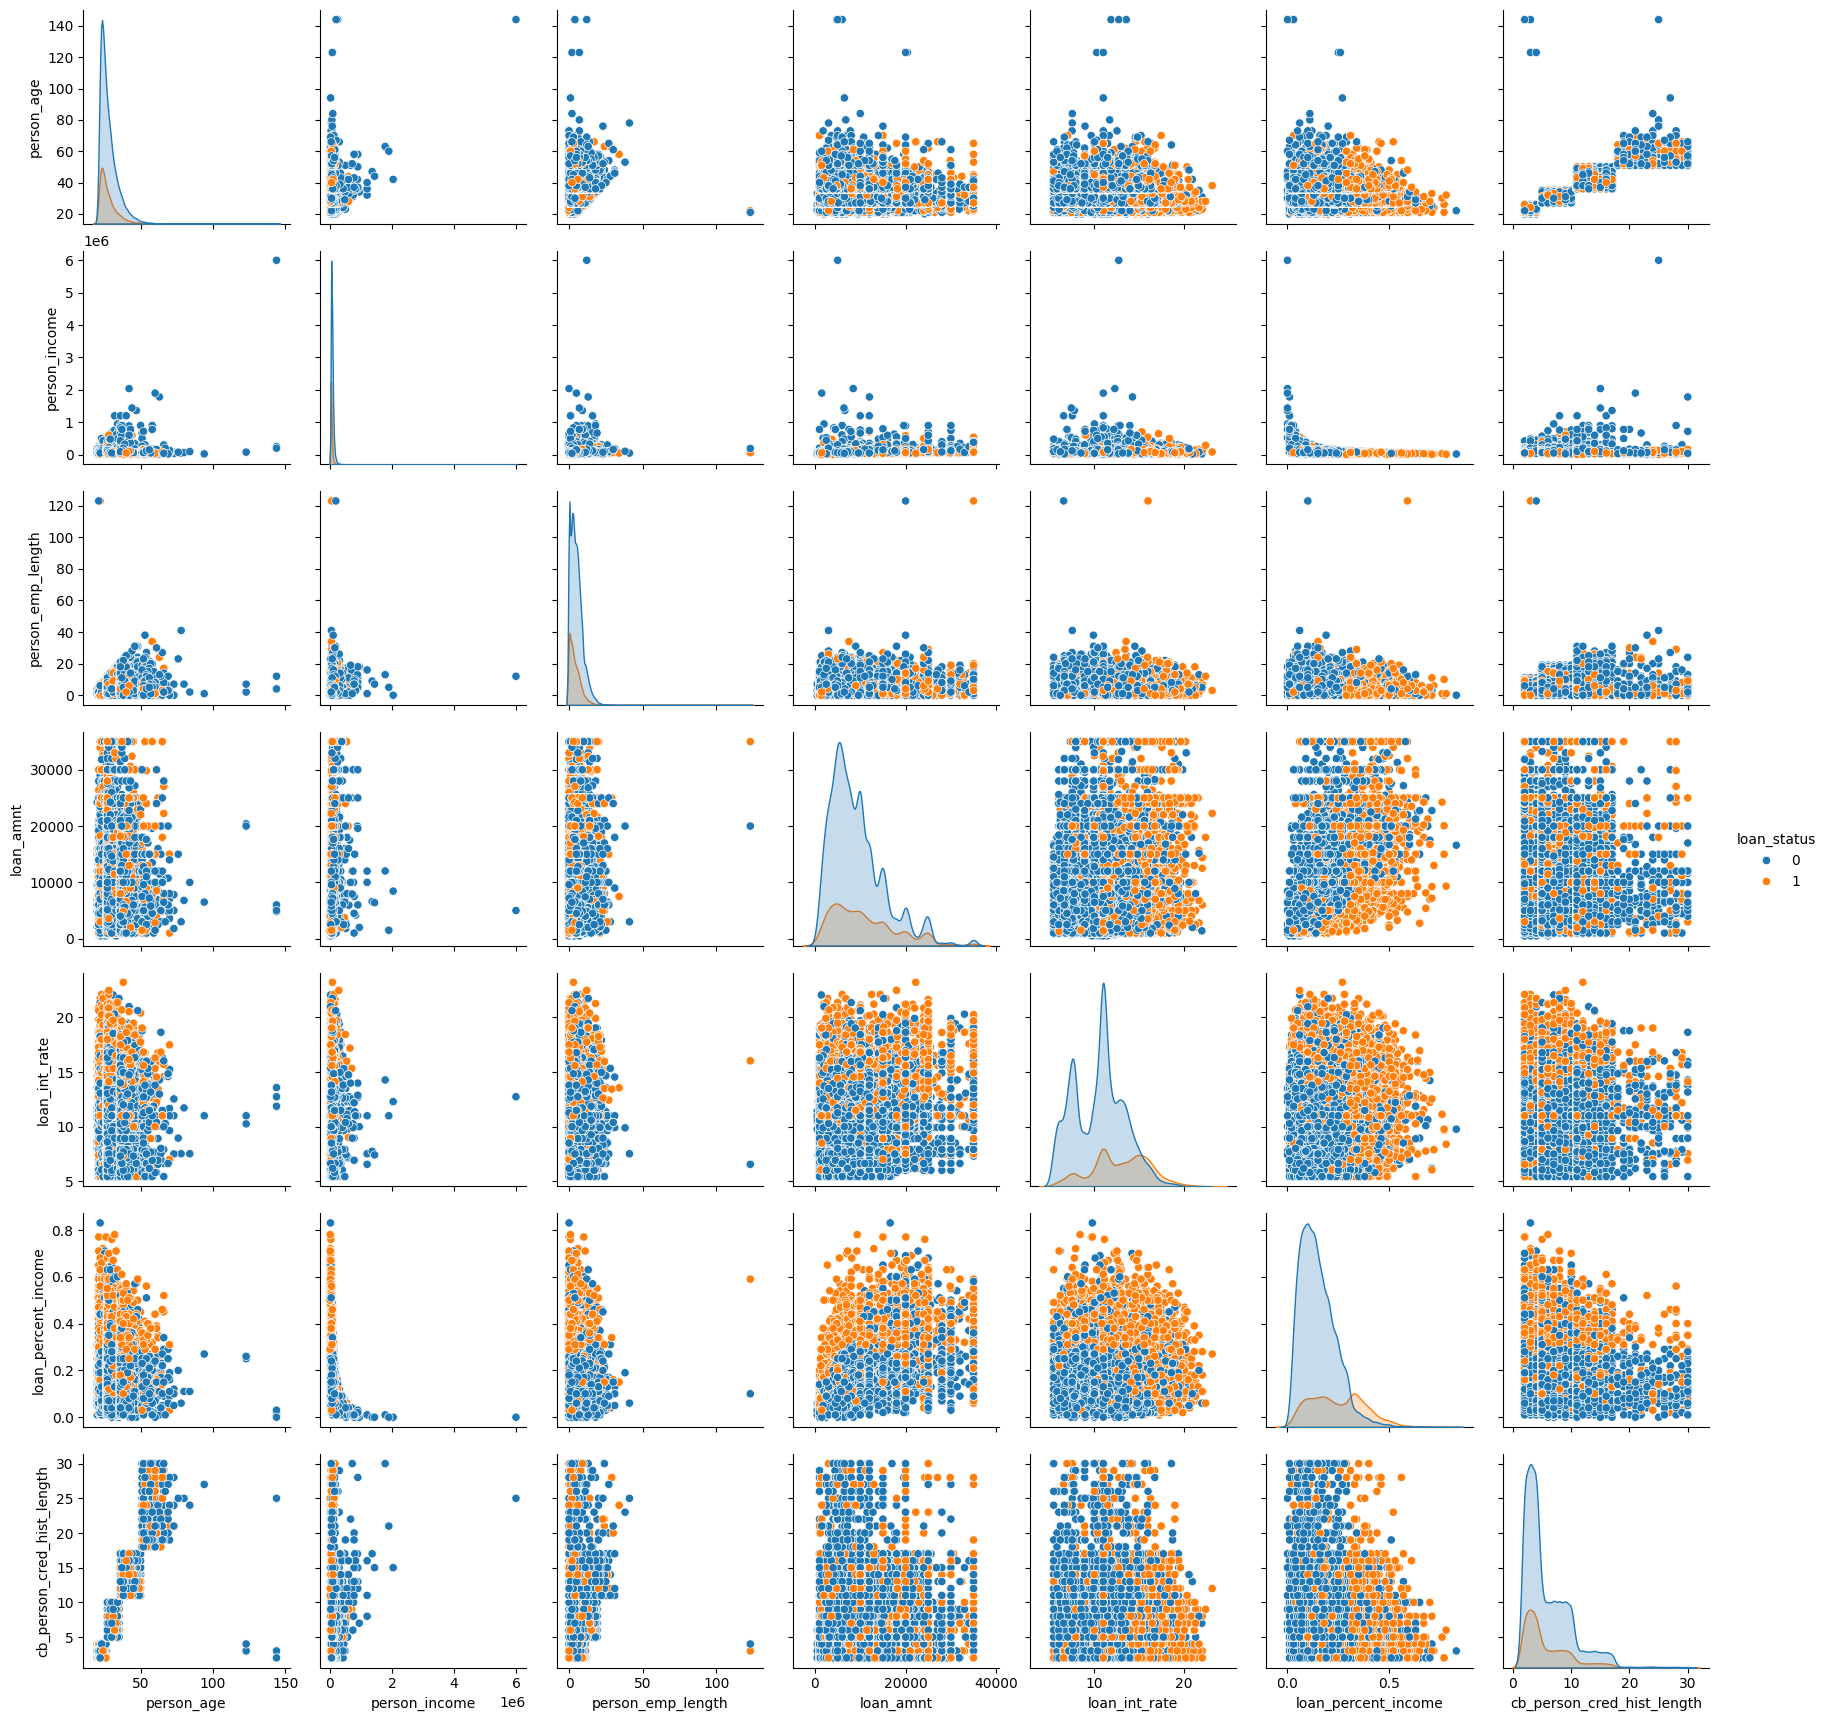

In [15]:
sns.pairplot(data=df, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='loan_int_rate'>

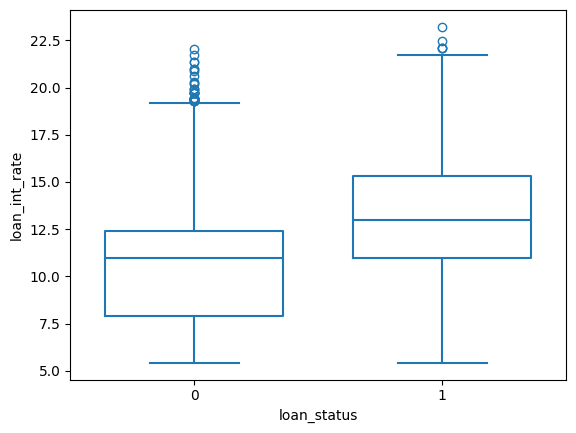

In [16]:
sns.boxplot(data=df, x="loan_status", y="loan_int_rate", fill=False, gap=.1)

<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

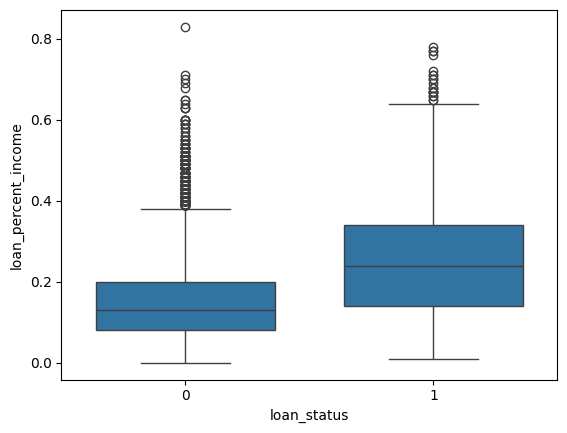

In [17]:
sns.boxplot(data=df, x="loan_status", y="loan_percent_income", gap=.1)

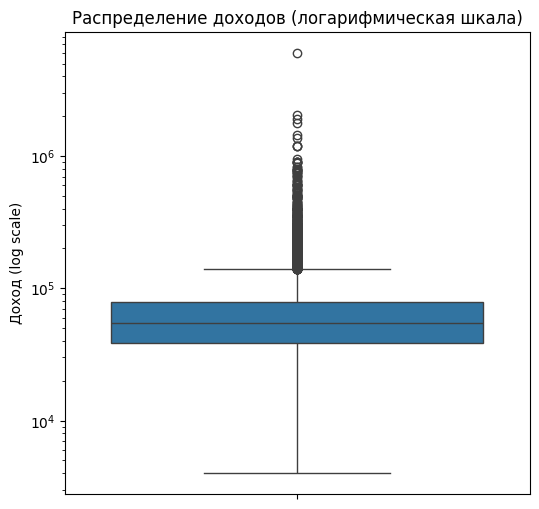

In [18]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y='person_income')
plt.yscale('log')  # применю логарифмическую шкалу из-за того, что здесь много больших значений
plt.title('Распределение доходов (логарифмическая шкала)')
plt.ylabel('Доход (log scale)')
plt.show()

In [19]:
print("Детальная статистика:")
print(df['person_income'].describe())
print("Перцентили:")
print(df['person_income'].quantile([0.95, 0.99]))

Детальная статистика:
count    3.258100e+04
mean     6.607485e+04
std      6.198312e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: person_income, dtype: float64
Перцентили:
0.95    138000.0
0.99    225200.0
Name: person_income, dtype: float64


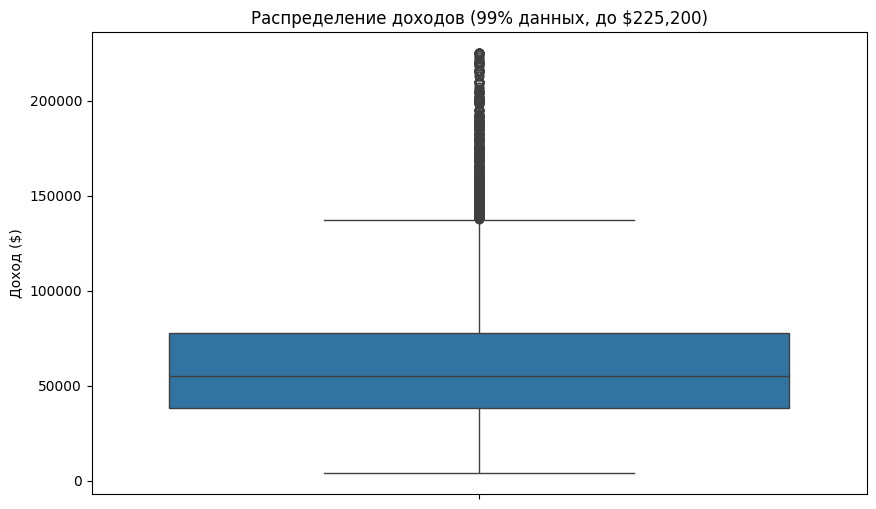

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['person_income'] <= 225200], y='person_income')
plt.title('Распределение доходов (99% данных, до $225,200)')
plt.ylabel('Доход ($)')
plt.show()

**Наблюдения:**

person_age: средний возраст человека 28 лет, при группировке по возрасту и средней продолжительности кредитной истории, можно увидеть, что нет смысла оставлять значения больше 100, потому что человек не доживает до этой отметки

person_emp_length: обычно после 60 трудовая деятельность человека прекращается, поэтому этот показатель нужно ограничить до 60

person_income: в данной колонке много выбросов, поэтому нужно поставить лимит до (примерно) 225.200

In [21]:
cleaned_df = df[df['person_age'] <= 100]
cleaned_df = df[df['person_emp_length'] <= 60]
cleaned_df = df[df['person_income'] <= 225200]

In [22]:
cleaned_df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<Axes: title={'center': 'Зависимость возраста от кредитного статуса'}, xlabel='person_age', ylabel='Count'>

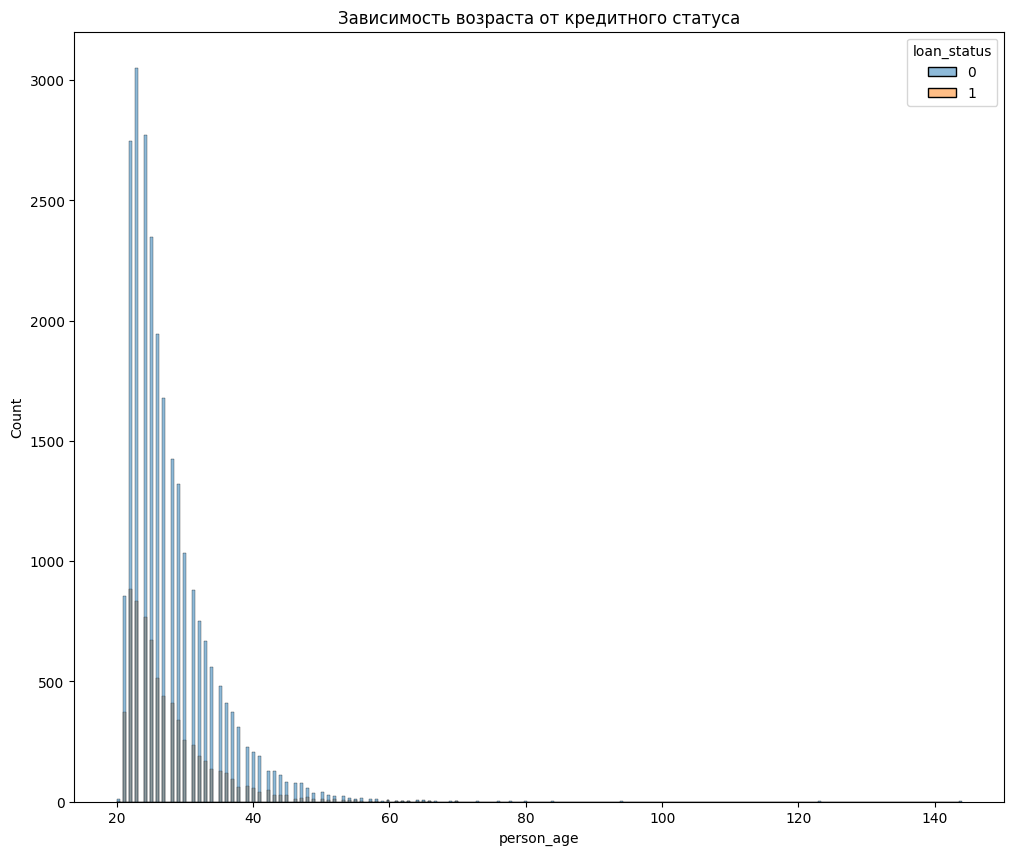

In [23]:
plt.figure(figsize=(12,10))
plt.title('Зависимость возраста от кредитного статуса')
sns.histplot(data=cleaned_df, x='person_age', hue='loan_status', fill=True)

**Наблюдение:**

Люди в более молодом возрасте (от 20 до 30 лет) не выплачивали кредиты гораздо чаще, чем люди среднего возраста.


Теперь я разделю людей на тех, кто имеет долг и на тех, кто не имеет.

In [24]:
the_debtor = cleaned_df[cleaned_df['loan_status'] == 1]
the_non_debtor = cleaned_df[cleaned_df['loan_status'] == 0]

/tmp/ipykernel_17/3713279562.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=the_debtor, x='loan_intent', palette='viridis')


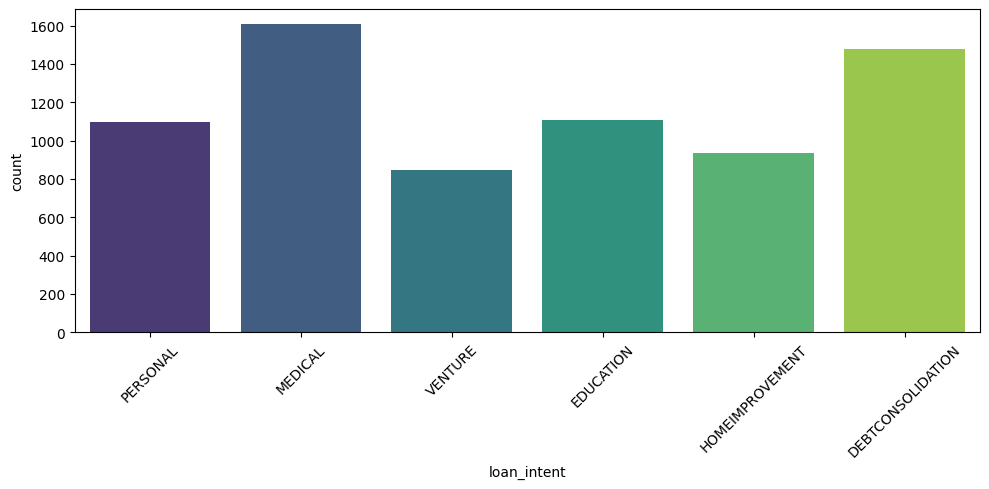

In [25]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.countplot(data=the_debtor, x='loan_intent', palette='viridis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Наблюдения:**

1. Как выянилось раньше, молодые люди чаще всего не могут выплатить долги из-за высокой стоимости медицины или, возможно, лекарств.

2. Консолидация долга - финансовая техника, которая позволяет упростить управление несколькими долгами, объединив их в одно, более управляемое обязательство.

/tmp/ipykernel_17/2899760581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=the_non_debtor, x='loan_intent', palette='viridis')


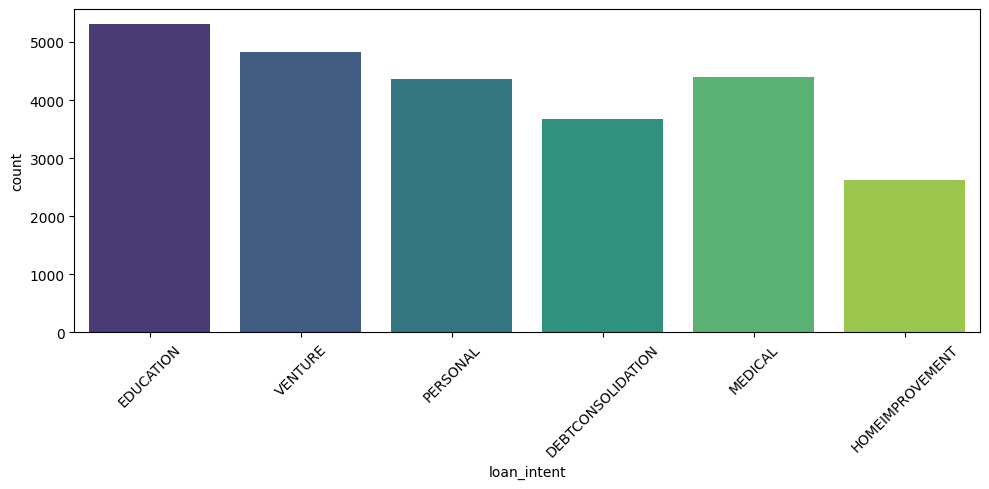

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(data=the_non_debtor, x='loan_intent', palette='viridis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Наблюдения:**

1. Люди, которые смогли выплатить кредиты, в осном потратили эту сумму на образование, развитие предприятия или личные цели.


In [27]:
# посмотрю, сбалансированны ли классы
cleaned_df['loan_status'].value_counts()
# классы не сбалансорованны, нужно поработать с балансом классов

loan_status
0    25187
1     7068
Name: count, dtype: int64

In [28]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32255 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32255 non-null  int64  
 1   person_income               32255 non-null  int64  
 2   person_home_ownership       32255 non-null  object 
 3   person_emp_length           32255 non-null  float64
 4   loan_intent                 32255 non-null  object 
 5   loan_grade                  32255 non-null  object 
 6   loan_amnt                   32255 non-null  int64  
 7   loan_int_rate               32255 non-null  float64
 8   loan_status                 32255 non-null  int64  
 9   loan_percent_income         32255 non-null  float64
 10  cb_person_default_on_file   32255 non-null  object 
 11  cb_person_cred_hist_length  32255 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


**Feature Scaling**

In [29]:
! pip install optuna
import optuna
from sklearn.model_selection import cross_val_score

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
import random
from xgboost import XGBClassifier
import xgboost as xgb

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=245, stratify=y)

In [32]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Числовые колонки:", numeric_features)
print("Категориальные колонки:", categorical_features)

Числовые колонки: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
Категориальные колонки: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [33]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('scaler', StandardScaler())])

In [34]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [36]:
print("Преобразование данных...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"X_train: {X_train.shape} - {X_train_processed.shape}")
print(f"X_test: {X_test.shape} - {X_test_processed.shape}")

Преобразование данных...
X_train: (26064, 11) - (26064, 26)
X_test: (6517, 11) - (6517, 26)


In [37]:
seed = 245
np.random.seed(seed)
random.seed(seed)

**XgBoost + Optuna**

In [38]:
def objective(trial):
    params = {
        'objective':'binary:logistic',
        'booster':'gbtree',
        'n_estimators': trial.suggest_int('n_estimators', 50, 2000),
        'max_depth': trial.suggest_int('max_depth', 2, 5),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_float('subsample', 0.0, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 1.0),
    }

    model = XGBClassifier(**params, random_state=245)
    score = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='roc_auc').mean()
    return score
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50, show_progress_bar=True)
print("Лучшие параметры:", study_xgb.best_params)
print("Лучший результат:", study_xgb.best_value)

[I 2026-01-18 11:28:46,819] A new study created in memory with name: no-name-7a57d346-093b-4b64-861c-38a54a7dd861


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2026-01-18 11:28:48,045] Trial 0 finished with value: 0.9298502905326315 and parameters: {'n_estimators': 228, 'max_depth': 3, 'learning_rate': 0.05734687071869839, 'subsample': 0.5910906611909523, 'colsample_bytree': 0.5720784318011194}. Best is trial 0 with value: 0.9298502905326315.
[I 2026-01-18 11:28:55,213] Trial 1 finished with value: 0.945063793308216 and parameters: {'n_estimators': 1306, 'max_depth': 4, 'learning_rate': 0.049325110133128514, 'subsample': 0.5793788152138439, 'colsample_bytree': 0.21740395001059576}. Best is trial 1 with value: 0.945063793308216.
[I 2026-01-18 11:28:59,739] Trial 2 finished with value: 0.8985647920207892 and parameters: {'n_estimators': 1580, 'max_depth': 2, 'learning_rate': 0.07498989111469213, 'subsample': 0.807103849158202, 'colsample_bytree': 0.008510357513281885}. Best is trial 1 with value: 0.945063793308216.
[I 2026-01-18 11:29:02,193] Trial 3 finished with value: 0.9202309205430484 and parameters: {'n_estimators': 449, 'max_depth': 4

In [39]:
optuna.visualization.plot_edf(study_xgb, target=None, target_name='loan_status')

In [40]:
optuna.visualization.plot_optimization_history(study_xgb)

In [41]:
print("Лучшие параметры:", study_xgb.best_params)

Лучшие параметры: {'n_estimators': 1983, 'max_depth': 5, 'learning_rate': 0.028814686023292593, 'subsample': 0.9626971510538795, 'colsample_bytree': 0.6403312517321817}


In [42]:
best_params = study_xgb.best_params

In [43]:
best_params.update({
    'random_state': 245,
    'n_jobs': -1
})

In [44]:
best_model = XGBClassifier(**best_params)
best_model.fit(X_train_processed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6403312517321817, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.028814686023292593,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1983, n_jobs=-1,
              num_parallel_tree=None, ...)

In [45]:
# предсказания на тестовых данных
y_pred_proba = best_model.predict_proba(X_test_processed)[:, 1]  # вероятности класса 1

# оценка качества
test_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC на тестовых данных: {test_auc:.3f}")

ROC-AUC на тестовых данных: 0.945


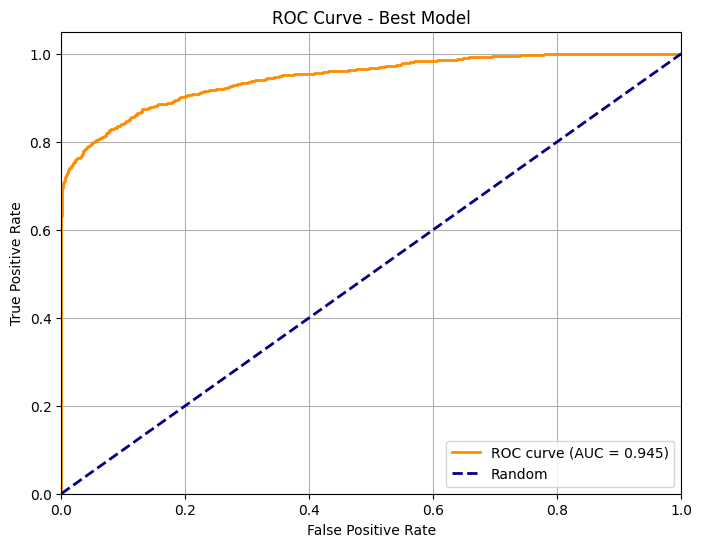

In [46]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = best_model.predict_proba(X_test_processed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**LightGBM + Optuna**

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [49]:
seed = 1000
np.random.seed(seed)
random.seed(seed)

In [50]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000, stratify=y)

In [51]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Числовые колонки:", numeric_features)
print("Категориальные колонки:", categorical_features)

Числовые колонки: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
Категориальные колонки: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [52]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [53]:
print("Преобразование данных...")
X_train_transformed = preprocessor.fit_transform(X_train)
X_valid_transformed = preprocessor.transform(X_test)

print(f"X_train: {X_train.shape} - {X_train_transformed.shape}")
print(f"X_test: {X_test.shape} - {X_valid_transformed.shape}")

Преобразование данных...
X_train: (26064, 11) - (26064, 26)
X_test: (6517, 11) - (6517, 26)


In [54]:
train_data = lgb.Dataset(X_train_transformed, label=y_train)
valid_data = lgb.Dataset(X_valid_transformed, label=y_test, reference=train_data)

In [55]:
def objective(trial):
    params = {
        'objective':'binary',
        'boosting_type':'gbdt',
        'metric': 'auc',
        'num_iterations': trial.suggest_int('num_iterations', 50, 2000),
        'max_depth': trial.suggest_int('max_depth', 2, 5),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_float('subsample', 0.0, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 1.0),
        'min_split_gain': trial.suggest_float('min_split_gain', 0, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 2, 50),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1.0),   # предотвращает переобучение
        'verbose': -1

    }

    model = lgb.train(
        params,
        train_data,
        num_boost_round=params['num_iterations'],
        valid_sets=[valid_data],
        callbacks=[
            lgb.early_stopping(stopping_rounds=50, verbose=False),
            lgb.log_evaluation(period=0)  # не выводит логи
        ]
    )

    best_score = model.best_score['valid_0']['auc']
    return best_score
study_lightgbm = optuna.create_study(direction='maximize')
study_lightgbm.optimize(objective, n_trials=50, show_progress_bar=True)
print("Лучшие параметры:", study_lightgbm.best_params)
print("Лучший результат:", study_lightgbm.best_value)

[I 2026-01-18 11:35:33,666] A new study created in memory with name: no-name-119f6a34-7ee3-453e-8e49-9f4a5d582d75


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2026-01-18 11:35:34,819] Trial 0 finished with value: 0.9474809836730806 and parameters: {'num_iterations': 921, 'max_depth': 3, 'learning_rate': 0.08103312731898571, 'subsample': 0.7403660924561696, 'colsample_bytree': 0.5454182487267953, 'min_split_gain': 0.059948982160729664, 'num_leaves': 15, 'bagging_fraction': 0.5915120735854941}. Best is trial 0 with value: 0.9474809836730806.
[I 2026-01-18 11:35:36,184] Trial 1 finished with value: 0.9514683737538112 and parameters: {'num_iterations': 1219, 'max_depth': 5, 'learning_rate': 0.035511962419402784, 'subsample': 0.19217609737152264, 'colsample_bytree': 0.9442116302074341, 'min_split_gain': 0.055516944005337666, 'num_leaves': 30, 'bagging_fraction': 0.18611285808726652}. Best is trial 1 with value: 0.9514683737538112.
[I 2026-01-18 11:35:37,797] Trial 2 finished with value: 0.9293159919338476 and parameters: {'num_iterations': 1244, 'max_depth': 3, 'learning_rate': 0.010050527100752271, 'subsample': 0.9902823193796106, 'colsample_

In [56]:
optuna.visualization.plot_edf(study_lightgbm, target=None, target_name='loan_status')

In [57]:
optuna.visualization.plot_optimization_history(study_lightgbm)

In [58]:
print("Лучшие параметры:", study_lightgbm.best_params)

Лучшие параметры: {'num_iterations': 1362, 'max_depth': 5, 'learning_rate': 0.06663693704203756, 'subsample': 0.9999788310037296, 'colsample_bytree': 0.5056399930287133, 'min_split_gain': 3.7752238824669514e-06, 'num_leaves': 45, 'bagging_fraction': 0.10458420874300606}


In [59]:
best_params = study_lightgbm.best_params

In [60]:
best_params.update({
    'random_state': 1000,
    'n_jobs': -1
})

In [61]:
best_model = LGBMClassifier(**best_params)
best_model.fit(
    X_train_transformed, 
    y_train,
    eval_set=[(X_valid_transformed, y_test)],
    eval_metric='auc',
    callbacks=[lgb.early_stopping(50, verbose=False)]
)

LGBMClassifier(bagging_fraction=0.10458420874300606,
               colsample_bytree=0.5056399930287133,
               learning_rate=0.06663693704203756, max_depth=5,
               min_split_gain=3.7752238824669514e-06, n_jobs=-1,
               num_iterations=1362, num_leaves=45, random_state=1000,
               subsample=0.9999788310037296)

In [62]:
y_pred_proba = best_model.predict_proba(X_valid_transformed)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC на тестовых данных: {test_auc:.3f}")

ROC-AUC на тестовых данных: 0.954


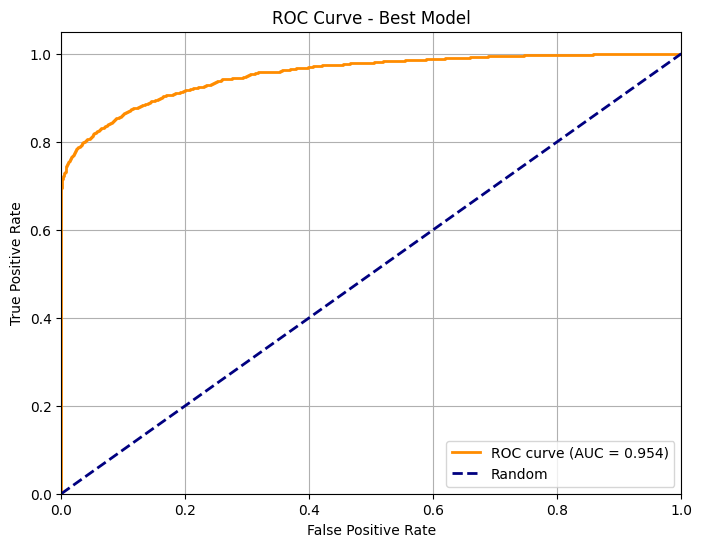

In [63]:
y_pred_proba = best_model.predict_proba(X_valid_transformed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**CatBoost + optuna**

In [64]:
! pip install catboost
import catboost as cb
from catboost import CatBoostClassifier
from catboost import Pool, cv

In [65]:
# те же самые действия
seed = 42
np.random.seed(seed)
random.seed(seed)

In [66]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [67]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Числовые колонки:", numeric_features)
print("Категориальные колонки:", categorical_features)

Числовые колонки: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
Категориальные колонки: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [68]:
train_pool = Pool(
    data=X_train,
    label=y_train,
    cat_features=categorical_features,
    feature_names=list(X_train.columns)
)

eval_pool = Pool(
    data=X_test,
    label=y_test,
    cat_features=categorical_features,
    feature_names=list(X_test.columns)
)

In [69]:
def objective(trial):
    params = {
        'loss_function': 'Logloss',
        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
        'eval_metric': 'AUC',
        'iterations': trial.suggest_int('iterations', 50, 2000),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.0, 10.0),
        'depth': trial.suggest_int('depth', 2, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'one_hot_max_size': trial.suggest_int('one_hot_max_size', 1, 25),
        'verbose': -1,
        'random_seed': 42,

    }

    model = CatBoostClassifier(**params)

    model.fit(
        train_pool,
        eval_set=eval_pool,
        early_stopping_rounds=30,
        verbose=False
    )

    best_score = model.best_score_['validation']['AUC']
    return best_score

study_catboost = optuna.create_study(direction='maximize')
study_catboost.optimize(objective, n_trials=30, show_progress_bar=True)
print("Лучшие параметры:", study_catboost.best_params)
print("Лучший результат:", study_catboost.best_value)

[I 2026-01-18 11:36:40,300] A new study created in memory with name: no-name-d932fbd4-640c-45b0-b599-839653e953b3


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2026-01-18 11:36:41,296] Trial 0 finished with value: 0.9218066304214303 and parameters: {'boosting_type': 'Plain', 'iterations': 111, 'l2_leaf_reg': 5.24180333887141, 'depth': 9, 'learning_rate': 0.03737189069866184, 'one_hot_max_size': 18}. Best is trial 0 with value: 0.9218066304214303.
[I 2026-01-18 11:37:08,885] Trial 1 finished with value: 0.9465810638653211 and parameters: {'boosting_type': 'Plain', 'iterations': 1887, 'l2_leaf_reg': 6.424383068182438, 'depth': 9, 'learning_rate': 0.02667252484627319, 'one_hot_max_size': 6}. Best is trial 1 with value: 0.9465810638653211.
[I 2026-01-18 11:37:15,186] Trial 2 finished with value: 0.9399132377927673 and parameters: {'boosting_type': 'Plain', 'iterations': 1221, 'l2_leaf_reg': 7.06692576328094, 'depth': 5, 'learning_rate': 0.016104177571231355, 'one_hot_max_size': 11}. Best is trial 1 with value: 0.9465810638653211.
[I 2026-01-18 11:37:19,746] Trial 3 finished with value: 0.9403778282947486 and parameters: {'boosting_type': 'Plai

In [70]:
optuna.visualization.plot_edf(study_catboost, target=None, target_name='loan_status')

In [71]:
optuna.visualization.plot_optimization_history(study_catboost)

In [72]:
print("Лучшие параметры:", study_catboost.best_params)

Лучшие параметры: {'boosting_type': 'Plain', 'iterations': 1396, 'l2_leaf_reg': 4.116590186710915, 'depth': 5, 'learning_rate': 0.09341564657563947, 'one_hot_max_size': 18}


In [73]:
best_params = study_catboost.best_params

In [74]:
best_model = CatBoostClassifier(**best_params)
best_model.fit(train_pool)

0:	learn: 0.6048079	total: 4.54ms	remaining: 6.33s
1:	learn: 0.5366035	total: 8.98ms	remaining: 6.26s
2:	learn: 0.4848462	total: 12.4ms	remaining: 5.77s
3:	learn: 0.4411971	total: 15.7ms	remaining: 5.47s
4:	learn: 0.4112684	total: 19ms	remaining: 5.29s
5:	learn: 0.3895944	total: 22.4ms	remaining: 5.18s
6:	learn: 0.3678412	total: 25.7ms	remaining: 5.09s
7:	learn: 0.3504913	total: 29.2ms	remaining: 5.07s
8:	learn: 0.3356215	total: 32.8ms	remaining: 5.05s
9:	learn: 0.3223418	total: 36.3ms	remaining: 5.04s
10:	learn: 0.3134937	total: 39.9ms	remaining: 5.03s
11:	learn: 0.3044783	total: 43.4ms	remaining: 5s
12:	learn: 0.2965539	total: 47.8ms	remaining: 5.09s
13:	learn: 0.2896666	total: 52.8ms	remaining: 5.21s
14:	learn: 0.2841670	total: 57.4ms	remaining: 5.29s
15:	learn: 0.2778278	total: 62.2ms	remaining: 5.36s
16:	learn: 0.2734266	total: 66.5ms	remaining: 5.4s
17:	learn: 0.2691724	total: 71.3ms	remaining: 5.46s
18:	learn: 0.2661702	total: 76.7ms	remaining: 5.56s
19:	learn: 0.2635514	total: 

In [75]:
y_pred_proba = best_model.predict_proba(eval_pool)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC на тестовых данных: {test_auc:.3f}")

ROC-AUC на тестовых данных: 0.954


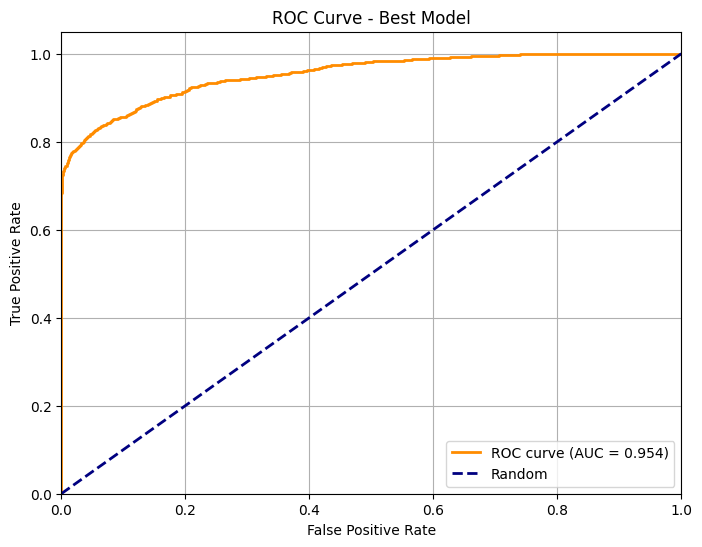

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **Результаты и их анализ**

**XgBoost - Optuna**:

ROC-AUC на тестовых данных: 0.945

**LightGBM - Optuna:**

ROC-AUC на тестовых данных: 0.955

**Catboost - Optuna:**

ROC-AUC на тестовых данных: 0.952

*Полученные результаты означают, что:*

- есть достаточно высокая точность выявления рисков: то есть модель эффективно идентифицирует дефолты;

- минимальные ложные срабатываний: то есть модель способна отсеять рисковых заемщиков, не отвергая при этом кредитоспособных;

- позволяет снизить долю проблемных кредитов.